# <Center> Keywords Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data Cleansing

In [2]:
df = pd.read_excel('Sept-3in1-searching traffic.xlsx', header = (0,1))
df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 搜索漏斗 - 展示量  \
                   搜索查询词条             搜索查询分数             搜索查询数量         总数   
0           bottle bottle                  1               2138      49721   
1  insulated water bottle                  2             328305    7402011   
2            water bottle                  3             914828   22636507   
3            bottlebottle                  4                386       9632   
4      slim water bottles                  5              14147     303811   

                  搜索漏斗 - 点击量                         搜索漏斗 - 加入购物车          \
  ASIN 计数 ASIN 分享         总数     点击率 ASIN 计数 ASIN 分享           总数  加入购物车率   
0    1593  0.0320        800  0.3742     147  0.1838           78  0.0365   
1    7899  0.0011     105308  0.3208      84  0.0008         9116  0.0278   
2    5481  0.0002     239231  0.2615      53  0.0002        27217  0.0298   
3     344  0.0357        188  0.4870      54  0.2872           16  0.0415   
4    2771  0.0091       5052  0.3571      32  0.0063          368  0.0260   

                  搜索漏斗 - 购买次数                             
  ASIN 计数 ASIN 分享          总数 3 个月内所有购买的 ASIN 计数 ASIN 分享  
0      20  0.2564          13     0.0061       3  0.2308  
1       5  0.0005        2387     0.0073       0       0  
2       9  0.0003        8284     0.0091       0       0  
3       8  0.5000           4     0.0104       2     0.5  
4       1  0.0027          58     0.0041       0       0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   (Unnamed: 0_level_0, 搜索查询词条)  100 non-null    object 
 1   (Unnamed: 1_level_0, 搜索查询分数)  100 non-null    int64  
 2   (Unnamed: 2_level_0, 搜索查询数量)  100 non-null    int64  
 3   (搜索漏斗 - 展示量, 总数)              100 non-null    int64  
 4   (搜索漏斗 - 展示量, ASIN 计数)         100 non-null    int64  
 5   (搜索漏斗 - 展示量, ASIN 分享)         100 non-null    float64
 6   (搜索漏斗 - 点击量, 总数)              100 non-null    int64  
 7   (搜索漏斗 - 点击量, 点击率)             100 non-null    float64
 8   (搜索漏斗 - 点击量, ASIN 计数)         100 non-null    int64  
 9   (搜索漏斗 - 点击量, ASIN 分享)         100 non-null    float64
 10  (搜索漏斗 - 加入购物车, 总数)            100 non-null    int64  
 11  (搜索漏斗 - 加入购物车, 加入购物车率)        100 non-null    float64
 12  (搜索漏斗 - 加入购物车, ASIN 计数)       100 non-null    int64  
 13  (搜索漏斗 

In [4]:
df['搜索漏斗 - 点击量']

,总数,点击率,ASIN 计数,ASIN 分享
0,800,0.3742,147,0.1838
1,105308,0.3208,84,0.0008
2,239231,0.2615,53,0.0002
3,188,0.4870,54,0.2872
4,5052,0.3571,32,0.0063
...,...,...,...,...
95,4,0.2105,2,0.5000
96,2977,0.3201,2,0.0007
97,14410,0.2819,2,0.0001
98,59,0.4041,1,0.0169


In [5]:
df[('搜索漏斗 - 点击量','点击率')]

0     0.3742
1     0.3208
2     0.2615
3     0.4870
4     0.3571
       ...  
95    0.2105
96    0.3201
97    0.2819
98    0.4041
99    0.5000
Name: (搜索漏斗 - 点击量, 点击率), Length: 100, dtype: float64

In [6]:
keywords = df[[('Unnamed: 0_level_0',     '搜索查询词条'), ('Unnamed: 1_level_0',     '搜索查询分数'), ('Unnamed: 2_level_0',     '搜索查询数量'),
              (        '搜索漏斗 - 展示量',         '总数'), (        '搜索漏斗 - 点击量',        '点击率'), (      '搜索漏斗 - 加入购物车',     '加入购物车率'),
                (       '搜索漏斗 - 购买次数', '3 个月内所有购买的')]]

keywords.columns = ['Keywords', 'Rank', 'Imp_distinct', 'Imp', 'Click_rate', 'Add_to_cart_rate', 'Buy_rate'] 
keywords.head()

,Keywords,Rank,Imp_distinct,Imp,Click_rate,Add_to_cart_rate,Buy_rate
0,bottle bottle,1,2138,49721,0.3742,0.0365,0.0061
1,insulated water bottle,2,328305,7402011,0.3208,0.0278,0.0073
2,water bottle,3,914828,22636507,0.2615,0.0298,0.0091
3,bottlebottle,4,386,9632,0.4870,0.0415,0.0104
4,slim water bottles,5,14147,303811,0.3571,0.0260,0.0041


## Word Cloud

In [7]:
words = ' '.join(w for w in keywords['Keywords'])

In [8]:
from wordcloud import WordCloud

wordcloud = WordCloud()
wc = wordcloud.generate(words)

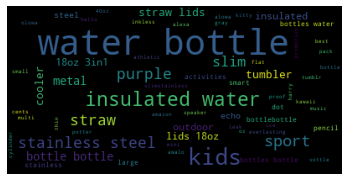

In [9]:
plt.figure()
plt.imshow(wc)
plt.axis('off')
plt.show()

Insights: 
1. Topic words: water bottle

2. Attributes: 

    2.1 function: insulated, straw, cooler, lids
    
    2.2 user: kids
    
    2.3 material: metal
    
    2.4 appearance: purple(color)
    
    2.5 size: 18oz 

## Clustering

### Tokenization

In [10]:
from unidecode import unidecode
def to_tokens(s, min_chars=3, stop_words=None):
    '''
    Transform sentences to a list of tokens/words: 
        ASCII, lowercase, stopwords, length of words.
    
    Input: sentences
    Output: tokens

    '''
    
    s = unidecode(str(s)) # convert to ASCII to remove special characters
    s = s.lower() # lowercase
    tokens = s.split(" ") # split the string into a list of words
    tokens = [token for token in tokens if len(token) >= min_chars] # remove short words
    if stop_words is not None:
        tokens = [token for token in tokens if token not in stop_words] # remove stop words
        
    tokens = sorted(set(tokens))
    
    return tokens 
    

In [11]:
# from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
stop_words = ["water", "bottle"]

keywords = keywords.copy()
keywords.loc[:, "Tokens"] = keywords["Keywords"].apply(lambda x: to_tokens(
    x,
    min_chars=3,
    stop_words=stop_words
))


keywords.head()

,Keywords,Rank,Imp_distinct,Imp,Click_rate,Add_to_cart_rate,Buy_rate,Tokens
0,bottle bottle,1,2138,49721,0.3742,0.0365,0.0061,[]
1,insulated water bottle,2,328305,7402011,0.3208,0.0278,0.0073,[insulated]
2,water bottle,3,914828,22636507,0.2615,0.0298,0.0091,[]
3,bottlebottle,4,386,9632,0.4870,0.0415,0.0104,[bottlebottle]
4,slim water bottles,5,14147,303811,0.3571,0.0260,0.0041,"[bottles, slim]"


### Vectorization

In [12]:
words = set(keywords["Tokens"].explode())
len(words)

69

In [13]:
def to_vector(text, words):
    vector=[]
    for i in words:
        if i in text:
            vector.append(1)
        else:
            vector.append(0)
    return vector

In [14]:
keywords["Vector"] = keywords["Tokens"].apply(lambda x: to_vector(
    x,
    words=words
))
keywords.head()

,Keywords,Rank,Imp_distinct,Imp,Click_rate,Add_to_cart_rate,Buy_rate,Tokens,Vector
0,bottle bottle,1,2138,49721,0.3742,0.0365,0.0061,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,insulated water bottle,2,328305,7402011,0.3208,0.0278,0.0073,[insulated],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,water bottle,3,914828,22636507,0.2615,0.0298,0.0091,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,bottlebottle,4,386,9632,0.4870,0.0415,0.0104,[bottlebottle],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,slim water bottles,5,14147,303811,0.3571,0.0260,0.0041,"[bottles, slim]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


### Cluster

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(keywords["Vector"].to_list())

keywords["Cluster"] = list(kmeans.labels_)
keywords.head(10)

,Keywords,Rank,Imp_distinct,Imp,Click_rate,Add_to_cart_rate,Buy_rate,Tokens,Vector,Cluster
0,bottle bottle,1,2138,49721,0.3742,0.0365,0.0061,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
1,insulated water bottle,2,328305,7402011,0.3208,0.0278,0.0073,[insulated],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
2,water bottle,3,914828,22636507,0.2615,0.0298,0.0091,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
3,bottlebottle,4,386,9632,0.4870,0.0415,0.0104,[bottlebottle],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
4,slim water bottles,5,14147,303811,0.3571,0.0260,0.0041,"[bottles, slim]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
5,bottle bottle water bottle,6,991,21247,0.4480,0.0555,0.0131,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
6,water bottles,7,1851432,41406200,0.2453,0.0354,0.0115,[bottles],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
7,metal water bottle,8,79587,1829112,0.3283,0.0327,0.0079,[metal],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
8,kawaii water bottle,9,46381,1078953,0.3331,0.0586,0.0034,[kawaii],"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
9,stainless steel water bottles,10,179617,3971366,0.3070,0.0265,0.0066,"[bottles, stainless, steel]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3


In [16]:
keywords.groupby("Cluster")["Keywords"].count()

Cluster
0    12
1    60
2    18
3     8
4     2
Name: Keywords, dtype: int64

## Visualization

In [17]:
from sklearn.decomposition import PCA

vectors = keywords["Vector"].to_list()

pca_2d = PCA(n_components=2).fit(vectors)
pca_2d = pca_2d.transform(vectors)

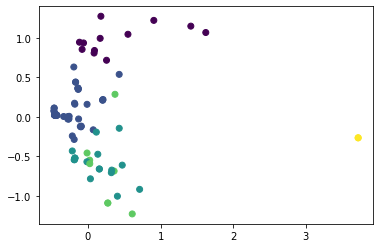

In [18]:
plt.scatter(pca_2d[:,0], pca_2d[:,1], c=keywords["Cluster"])